In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
from sklearn import preprocessing
import sklearn.decomposition as skde
import sklearn.metrics as sklm
import sklearn.datasets as skds
import graphviz 
from sklearn import tree
import itertools

%matplotlib inline

In [92]:
bikesData = pd.read_csv('BikesProcessed.csv')
Labels = np.array(bikesData['BikeBuyer'])
bikesData.drop(bikesData.columns[0], axis=1, inplace=True)
bikesData.drop(['BikeBuyer'], axis=1, inplace=True)
Features = np.array(bikesData)
print(Features.shape)
bikesData.head()

(16404, 12)


,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,AreaCode,Sex,Married,JobType,EducationType,Country,Income,AgeBracket,ChildrenFlag
0,1,0,0,500,1,1,0,0,1,3,0,1
1,0,1,3,500,1,0,0,0,1,3,1,1
2,1,1,3,500,1,1,0,0,1,2,1,1
3,0,1,0,500,0,0,0,0,1,2,0,0
4,1,4,5,500,0,0,0,0,1,2,0,1


In [93]:
important_features = pd.read_csv('NCV_DecisionForest_Trees_Features.csv')
important_features = important_features.sort_values(by='accuracy', ascending=False)
important_features.head()

,Unnamed: 0,est_max_features,est_n_estimators,cv_mean,cv_std,size,CV_accuracy,accuracy,combs
46,46,4,100,0.772677,0.006176,11,0.773025,0.7748,"['HomeOwnerFlag', 'NumberChildrenAtHome', 'Are..."
19,19,2,100,0.782004,0.005159,8,0.789150,0.7710,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo..."
1,1,6,10,0.790052,0.006531,7,0.792400,0.7698,"['NumberChildrenAtHome', 'Sex', 'Married', 'Jo..."
41,41,7,25,0.778835,0.008924,10,0.777500,0.7696,"['NumberCarsOwned', 'NumberChildrenAtHome', 'A..."
6,6,4,25,0.788772,0.008875,6,0.791700,0.7694,"['NumberChildrenAtHome', 'Sex', 'Married', 'Ed..."


In [94]:
combs = np.array(important_features['combs'])
feature_combs = []
for item in combs:
    item = item.replace('(', '')
    item = item.replace(')', '')
    item = item.replace(',', '')
    item = item.replace('\'', '')
    item = item.split()
    feature_combs.append(item)
feature_combs

[['[HomeOwnerFlag',
  'NumberChildrenAtHome',
  'AreaCode',
  'Sex',
  'Married',
  'JobType',
  'EducationType',
  'Country',
  'Income',
  'AgeBracket',
  'ChildrenFlag]'],
 ['[NumberChildrenAtHome',
  'Sex',
  'Married',
  'JobType',
  'EducationType',
  'Income',
  'AgeBracket',
  'ChildrenFlag]'],
 ['[NumberChildrenAtHome',
  'Sex',
  'Married',
  'JobType',
  'EducationType',
  'AgeBracket',
  'ChildrenFlag]'],
 ['[NumberCarsOwned',
  'NumberChildrenAtHome',
  'AreaCode',
  'Sex',
  'Married',
  'JobType',
  'EducationType',
  'Country',
  'AgeBracket',
  'ChildrenFlag]'],
 ['[NumberChildrenAtHome',
  'Sex',
  'Married',
  'EducationType',
  'AgeBracket',
  'ChildrenFlag]'],
 ['[HomeOwnerFlag',
  'NumberCarsOwned',
  'NumberChildrenAtHome',
  'AreaCode',
  'Sex',
  'Married',
  'JobType',
  'EducationType',
  'Country',
  'AgeBracket',
  'ChildrenFlag]'],
 ['[NumberCarsOwned',
  'NumberChildrenAtHome',
  'AreaCode',
  'Sex',
  'Married',
  'JobType',
  'EducationType',
  'AgeBrac

In [95]:
feat = important_features['combs'].iloc[0]
feat = feat.replace('[', '')
feat = feat.replace(']', '')
feat = feat.replace(',', '')
feat = feat.replace('\'', '')
feat = feat.split()
feat

['HomeOwnerFlag',
 'NumberChildrenAtHome',
 'AreaCode',
 'Sex',
 'Married',
 'JobType',
 'EducationType',
 'Country',
 'Income',
 'AgeBracket',
 'ChildrenFlag']

In [96]:
#Scale the data
scaler = preprocessing.StandardScaler().fit(Features)
Features = scaler.transform(Features)
titles = list(bikesData)
bikes_scaled = pd.DataFrame()
count = 0
Features = pd.DataFrame(Features)

for title in titles:
    bikes_scaled[title] = Features[count]
    count+=1

bikes_scaled.head()

/Users/grahamcooper/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/grahamcooper/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,AreaCode,Sex,Married,JobType,EducationType,Country,Income,AgeBracket,ChildrenFlag
0,0.695306,-1.316615,-0.654523,-1.024189,0.989328,0.923656,-1.128274,-1.148595,-0.296932,1.246941,-1.011425,0.590773
1,-1.438215,-0.438729,1.326679,-1.024189,0.989328,-1.082654,-1.128274,-1.148595,-0.296932,1.246941,0.288843,0.590773
2,0.695306,-0.438729,1.326679,-1.024189,0.989328,0.923656,-1.128274,-1.148595,-0.296932,0.398228,0.288843,0.590773
3,-1.438215,-0.438729,-0.654523,-1.024189,-1.010787,-1.082654,-1.128274,-1.148595,-0.296932,0.398228,-1.011425,-1.692697
4,0.695306,2.194929,2.647481,-1.024189,-1.010787,-1.082654,-1.128274,-1.148595,-0.296932,0.398228,-1.011425,0.590773


In [97]:
cv = ms.ShuffleSplit(n_splits=8, test_size=5000, random_state=0)
Labels = Labels.reshape(Labels.shape[0],)
scoring = ['accuracy']#,'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

In [98]:
size = []
accuracy = []
trees = []
feats = []
combs = []
#f1 = []
#precision = []
#recall = []
#auc = []
count = 0
nr.seed(1115)

for feat_num in range(1,len(feat)+1):
    for tree_num in range(1,101):
        comb_features = np.array(bikes_scaled[np.array(feat)])
        rf_clf = RandomForestClassifier(max_features = feat_num,
                                        n_estimators = tree_num,
                                        n_jobs = -2)
        
        scores = ms.cross_validate(rf_clf, comb_features, Labels, scoring=scoring,
                        cv=cv, return_train_score=False)
        
        accuracy.append(np.mean(scores['test_accuracy']))
        feats.append(feat_num)
        trees.append(tree_num)
        combs.append(feat)
        count += 1
        print(round((count/1200)*100, 2))

0.08
0.17
0.25
0.33
0.42
0.5
0.58
0.67
0.75
0.83
0.92
1.0
1.08
1.17
1.25
1.33
1.42
1.5
1.58
1.67
1.75
1.83
1.92
2.0
2.08
2.17
2.25
2.33
2.42
2.5
2.58
2.67
2.75
2.83
2.92
3.0
3.08
3.17
3.25
3.33
3.42
3.5
3.58
3.67
3.75
3.83
3.92
4.0
4.08
4.17
4.25
4.33
4.42
4.5
4.58
4.67
4.75
4.83
4.92
5.0
5.08
5.17
5.25
5.33
5.42
5.5
5.58
5.67
5.75
5.83
5.92
6.0
6.08
6.17
6.25
6.33
6.42
6.5
6.58
6.67
6.75
6.83
6.92
7.0
7.08
7.17
7.25
7.33
7.42
7.5
7.58
7.67
7.75
7.83
7.92
8.0
8.08
8.17
8.25
8.33
8.42
8.5
8.58
8.67
8.75
8.83
8.92
9.0
9.08
9.17
9.25
9.33
9.42
9.5
9.58
9.67
9.75
9.83
9.92
10.0
10.08
10.17
10.25
10.33
10.42
10.5
10.58
10.67
10.75
10.83
10.92
11.0
11.08
11.17
11.25
11.33
11.42
11.5
11.58
11.67
11.75
11.83
11.92
12.0
12.08
12.17
12.25
12.33
12.42
12.5
12.58
12.67
12.75
12.83
12.92
13.0
13.08
13.17
13.25
13.33
13.42
13.5
13.58
13.67
13.75
13.83
13.92
14.0
14.08
14.17
14.25
14.33
14.42
14.5
14.58
14.67
14.75
14.83
14.92
15.0
15.08
15.17
15.25
15.33
15.42
15.5
15.58
15.67
15.75
15.83
15.92
16.0

In [99]:
midx = pd.DataFrame()
midx['trees'] = trees
midx['feats'] = feats
midx['accuracy'] = accuracy
#midx['precision'] = precision
#midx['recall'] = recall
#midx['f1'] = f1
#midx['AUC'] = auc
midx['combs'] = combs
midx.to_csv('Grid_DecisionForest.csv')

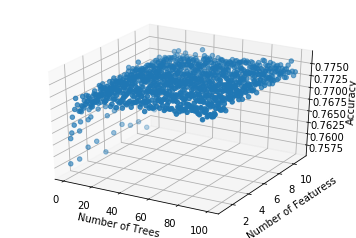

In [157]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(midx['trees'], midx['feats'], midx['accuracy'])
threedee.set_xlabel('Number of Trees')
threedee.set_ylabel('Number of Featuress')
threedee.set_zlabel('Accuracy')
plt.show()

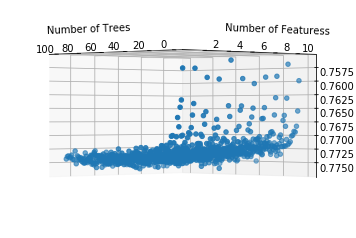

In [184]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(midx['trees'], midx['feats'], midx['accuracy'])
threedee.set_xlabel('Number of Trees')
threedee.set_ylabel('Number of Featuress')
threedee.set_zlabel('Accuracy')
threedee.view_init(180, 45)
plt.show()

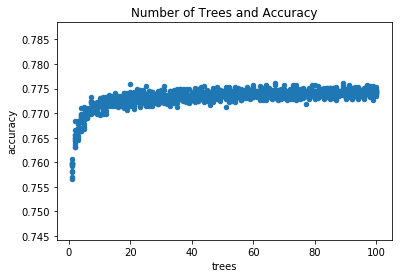

In [185]:
midx.plot.scatter(x='trees', y='accuracy', title='Number of Trees and Accuracy')

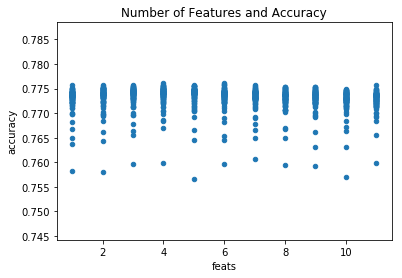

In [186]:
midx.plot.scatter(x='feats', y='accuracy', title='Number of Features and Accuracy')